<a href="https://colab.research.google.com/github/pujangrg1/pujan_INFO5731_Spring2020/blob/main/In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

**Reading data**

In [32]:
#Write your code here.
import pandas as pd
amazon_data = pd.read_csv("sample_data/Amazon_Unlocked_Mobile.csv")
amazon_data = amazon_data.head(10000)
amazon_data

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
9995,"Apple iPhone 4 8GB, Unlocked (Black)",NaN,122.00,1,Words can't describe how unsatisfied I am. The...,2.0
9996,"Apple iPhone 4 8GB, Unlocked (Black)",NaN,122.00,2,First of all the Iphone receive was in great c...,2.0
9997,"Apple iPhone 4 8GB, Unlocked (Black)",NaN,122.00,4,Should of been black color but only had white ...,0.0
9998,"Apple iPhone 4 8GB, Unlocked (Black)",NaN,122.00,1,The phone was NOT unlocked when I received it....,0.0


In [33]:
amazon_data.shape

(10000, 6)

In [34]:
#removing null values
cleaned_data = amazon_data.dropna()
cleaned_data.shape

(7226, 6)

**Visualization of Product ratings**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


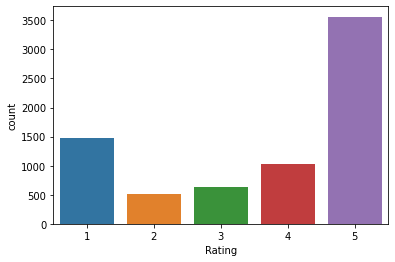

In [35]:
import seaborn as sns
sns.countplot(cleaned_data.Rating)

**Classification of ratings as Postive or Negative**

In [36]:
def review_classification(rating):
    if rating < 3:
        return 'Negative'
    return 'Positive'

rating_classification = cleaned_data['Rating'].map(review_classification) 
cleaned_data['Rating'] = rating_classification

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [37]:
cleaned_data['Rating'].value_counts()

Positive    5233
Negative    1993
Name: Rating, dtype: int64

**Visualization of Postive and Negative ratings**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


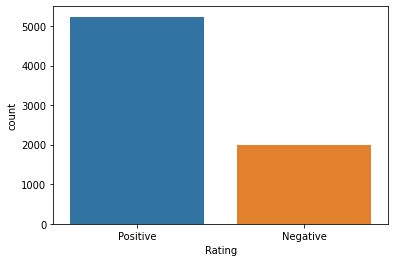

In [38]:
import seaborn as sns
sns.countplot(cleaned_data.Rating)

**Data Preprocessing and Cleaning**

In [39]:
import re
x = 0;
for i in cleaned_data['Reviews'].values:
    if (len(re.findall('<.*?>', i))):
        print(x)
        print(i)
        break;
    x += 1;

3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [40]:
def cleanhtml(sentence):
    reg = re.compile('<.*?>')
    cleantext = re.sub(reg, ' ', sentence)
    return cleantext

In [41]:
#Transforming to LowerCase, Removing HTML Content, Removing Special Characters
import re
cleaned_data['Cleaned Text'] = cleaned_data['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
cleaned_data['Cleaned Text'] = cleaned_data['Cleaned Text'].apply(lambda x: cleanhtml(x))
cleaned_data['Cleaned Text'] = cleaned_data['Cleaned Text'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [42]:
#Removal of Stop Words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
cleaned_data['Cleaned Text'] = cleaned_data['Cleaned Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
cleaned_data

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cleaned Text
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone us used hard phone...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Positive,Very pleased,0.0,pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Positive,It works good but it goes slow sometimes but i...,0.0,works good goes slow sometimes good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Positive,Great phone to replace my lost phone. The only...,0.0,great phone replace lost phone thing volume bu...
...,...,...,...,...,...,...,...
9950,Apple iPhone 4 8GB Verizon CDMA Smartphone - B...,Apple,92.00,Positive,I received it the way I wanted it,1.0,received way wanted
9951,Apple iPhone 4 8GB Verizon CDMA Smartphone - B...,Apple,92.00,Positive,Good!,1.0,good
9952,Apple iPhone 4 8GB Verizon CDMA Smartphone - B...,Apple,92.00,Positive,Love it,1.0,love
9953,Apple iPhone 4 8GB Verizon CDMA Smartphone - B...,Apple,92.00,Positive,Phone is great but charger did not work at all,2.0,phone great charger work


**K-MEANS using Bag of Words**

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
vector_count = CountVectorizer()
bg = vector_count.fit_transform(cleaned_data['Cleaned Text'].values)
column_names = vector_count.get_feature_names()
model = KMeans(n_clusters = 10, init='k-means++', n_jobs = -1, random_state=99)
model.fit(bg)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [46]:
labels = model.labels_
cluster_center = model.cluster_centers_
cluster_center

array([[0.02807018, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02714932, 0.        , 0.        , ..., 0.00904977, 0.00452489,
        0.00452489],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01666667],
       ...,
       [0.33333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.15789474, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00231392, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [48]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bg, labels, metric='euclidean')
silhouette_score

0.2080210321419799

In [50]:
cleaned_data['Bow Clus Label'] = model.labels_
cleaned_data.groupby(['Bow Clus Label'])['Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Bow Clus Label
0     285
1     221
2      60
3       4
4       1
5     171
6    1276
7       3
8      19
9    5186
Name: Reviews, dtype: int64

In [51]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vector_count.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: iphone
 phone
 new
 like
 apple
 buy
 used
 3gs
 one
 screen
Cluster 1: phone
 screen
 good
 great
 one
 camera
 battery
 like
 price
 speakers
Cluster 2: phone
 screen
 use
 like
 good
 really
 card
 sim
 great
 battery
Cluster 3: phone
 camera
 good
 like
 quality
 one
 price
 screen
 display
 app
Cluster 4: phone
 idol
 camera
 one
 like
 sound
 think
 device
 quality
 screen
Cluster 5: phone
 one
 good
 would
 great
 screen
 like
 use
 battery
 get
Cluster 6: phone
 new
 great
 good
 one
 would
 work
 screen
 use
 like
Cluster 7: like
 phone
 camera
 screen
 android
 keyboard
 also
 would
 google
 phones
Cluster 8: phone
 screen
 like
 one
 good
 use
 battery
 phones
 time
 would
Cluster 9: phone
 great
 good
 works
 new
 work
 like
 iphone
 product
 price


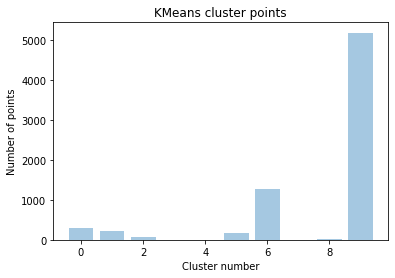

In [52]:
# visually how points or reviews are distributed across 10 clusters 
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

**K Means using Average Words to Vectors**

In [54]:
list_of_sentences = []
for sentence in cleaned_data['Cleaned Text'].values:
    list_of_sentences.append(sentence.split())

In [55]:
import gensim
import numpy as np

wTOv_model=gensim.models.Word2Vec(list_of_sentences,size=100, workers=4)

sentence_vectors = []
for s in list_of_sentences:
  v = np.zeros(100)
  word_count = 0
  for word in s:
    try:
      vec = wTOv_model.wv[word]
      v += vec
      word_count += 1
    except:
      pass
  v /= word_count
  sentence_vectors.append(v)
sentence_vectors = np.array(sentence_vectors)
sentence_vectors = np.nan_to_num(sentence_vectors)
sentence_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


(7226, 100)

In [56]:
number_of_clusters = [x for x in range(3,11)]
number_of_clusters

[3, 4, 5, 6, 7, 8, 9, 10]

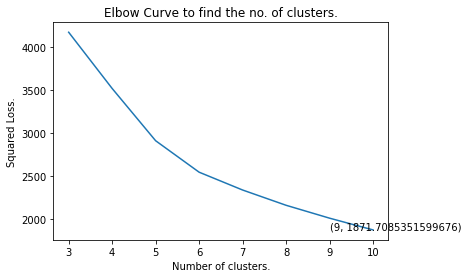

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  1871.7085351599676


In [60]:

squared_errors = []
for cluster in number_of_clusters:
    kmeans = KMeans(n_clusters = cluster).fit(sentence_vectors)
    squared_errors.append(kmeans.inertia_)
    
optimal_clusters = np.argmin(squared_errors) + 2 
plt.plot(number_of_clusters, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [63]:
from sklearn.cluster import KMeans
second_model = KMeans(n_clusters = optimal_clusters)
second_model.fit(sentence_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
word_cluster_pred = second_model.predict(sentence_vectors)
word_cluster_pred_2 = second_model.labels_
word_cluster_center = second_model.cluster_centers_
word_cluster_center[1:2]

array([[-0.20767509,  0.19343356,  0.20432915, -0.37276867,  0.11158638,
         0.19403448,  0.2345996 , -0.05009647, -0.12836453, -0.47244609,
        -0.01914098, -0.17088402,  0.35967296, -0.43855154,  0.098722  ,
         0.01498683,  0.12721775, -0.09977054, -0.22191355, -0.0701634 ,
        -0.06802478, -0.01689625,  0.07706933,  0.32698219,  0.2591828 ,
        -0.20732063,  0.23458423,  0.30181874, -0.26931344, -0.24887289,
        -0.21354974, -0.11361566,  0.22219981,  0.61150354, -0.2438969 ,
         0.14816152, -0.16673586, -0.04174684, -0.28355711,  0.32902703,
         0.36702789,  0.54312   ,  0.60328773, -0.06076078,  0.13710774,
         0.4446028 , -0.38408145,  0.07515871, -0.19119665, -0.54672358,
        -0.05766834, -0.26303275, -0.26718939, -0.05057733, -0.30058156,
         0.11171281, -0.37818063, -0.01195914, -0.20475247,  0.39652243,
        -0.11345994,  0.1537628 ,  0.100413  , -0.07390947,  0.00698985,
        -0.08780369, -0.08239687, -0.21133371,  0.1

In [69]:
# Reading a review which belong to each group.
for i in range(10):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(cleaned_data.iloc[cleaned_data.groupby(['Bow Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
you only got me two belt clip and one not functioner properly.


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
I originally was using the Samsung S2 Galaxy for Sprint and wanted to return back to the Samsung EPIC 4G for Sprint because I really missed the keyboard, I really liked the smaller compact size of the phone, and I still needed some of the basic functions of a smart phone (i.e. checking e-mail, getting directions, text messaging) Because the phone is not as powerful as the newer cell phones out there, just be aware that the more applications you install the slower the phone runs and will most likely freeze up from time to time. But the camera works great, the video is great as well, and even the web browsing is decent and gives me what I need. I

In [70]:
# Giving Labels/assigning a cluster to each point/text 
dfa = cleaned_data
dfa['AVG-W2V Clus Label'] = second_model.labels_
dfa.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cleaned Text,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone us used hard phone...,6,5
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...,6,1


In [72]:
# Reading a review which belong to each group.
for i in range(optimal_clusters):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(dfa.iloc[dfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(dfa.iloc[dfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
It worked alright, until i qccidetly pushed the silent button (wich was not explained in miserable chinglish user guide.Then it completely stopped my incoming calls,and icound not reset it.


the phone got delivered so fast & the phone is working great! I love it!!


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung


The charging port was loose. I got that soldered in. Then needed a new battery as well. $100 later (not including cost of purchase) I have a usable phone. The phone should not have been sold in the state it was in.


_______________

**Clustering DBSCAN**

In [73]:
from sklearn.cluster import DBSCAN

minPts = 2 * 100
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] 

In [76]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in sentence_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sentence_vectors[:1500]) )
twohundrethneigh.sort()

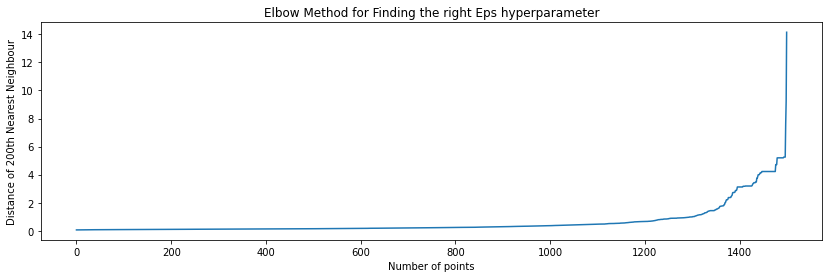

In [77]:
# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [78]:
# Training DBSCAN :
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sentence_vectors)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [79]:
dfdb = dfa
dfdb['AVG-W2V Clus Label'] = model.labels_
dfdb.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Product Name,Brand Name,Reviews
AVG-W2V Clus Label,,,
0,7226,7226,7226


**Clustering Hierarchical**

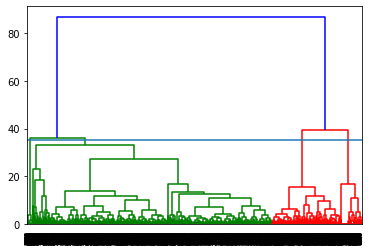

In [80]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sentence_vectors,method='ward'))
plt.axhline(y=35)# cut at 30 to get 5 clusters

In [81]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sentence_vectors)


In [82]:
# Giving Labels/assigning a cluster to each point/text 
aggdfa = dfdb
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cleaned Text,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone us used hard phone...,6,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,Positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...,6,0


In [83]:
# How many points belong to each cluster ->
aggdfa.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    4790
1     379
2    1482
3     132
4     443
Name: Reviews, dtype: int64

In [84]:
# Reading a review which belong to each group.
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
Had this phone before and loved it but was not working so I got this phone. One thing is the SD card slot does not open u

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

Hierarchical clustering excels at discovering embedded structures in the data, and DBSCAN approaches excel at 
finding an unknown number of clusters of similar density. However, both fail at finding a ‘consensus’ across the full 
dataset. Hierarchical clustering can put together clusters that seem close, but no information about other points is 
considered. DBSCAN methods only look at a small neighborhood of nearby points and similarly fail to consider the full dataset. DBSCAN clustering methods provide a safety valve. Instead of assuming that every point is part of some cluster, we only look at points that are tightly packed and assume everything else is noise.
K-means considers every point in the dataset and uses that information to evolve the clustering over a series of iterations.